In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

from __future__ import print_function

import scipy.io as sio
import numpy as np
import numpy.random as rng


In [53]:
def generate(n, radius, origin, precision, start_ph, angle_range, rotate, rotate_precision):
    phase = rng.uniform(low = start_ph, high = start_ph + angle_range, size = (n, 1) )
    radius = rng.normal(loc = radius, scale = radius/precision, size = (n, 1))
    feature = np.add(origin, radius  * np.append(np.cos(phase), np.sin(phase), axis = 1))


    rotate_ph = rng.normal(loc = rotate, scale = 1/10000., size = (n, 1))
    for i in range(n):
        ph = rotate_ph[i]
        Rotate_M = [[np.cos(ph), -np.sin(ph)],[np.sin(ph), np.cos(ph)]]
        feature[i, :] = np.dot(feature[i, :], np.transpose(Rotate_M))
    
    return feature
    
    

In [54]:
pi = np.pi
n = 2000
N_s = n
N_a = n
N_b = n
N_t = N_a + N_b

#---------------------------------------------------
angle_range_S = pi/2
radius_S = 0.5

gap = radius_S/2.
S_0_origin = [-gap, -gap/2]          #The origin of source domain with label = 0
S_0_precision = 30.
S_0_start_ph = pi/4         #The start phase of data

S_1_origin = np.add(S_0_origin, [2*gap, gap])          #The origin of source domain with label = 1
S_1_start_ph = pi + pi/4
S_1_precision = 30.
#---------------------------------------------------

angle_range_A = pi / 3
radius_A = radius_S

A_0_origin = S_0_origin          #The origin of target domain with label = 0
A_0_start_ph = -pi/8         #The start phase of data
A_0_precision = S_0_precision

A_1_origin = S_1_origin           #The origin of target domain with label = 1
A_1_start_ph = pi-pi/8
A_1_precision = S_1_precision

A_rotate = pi/5            #rotate source data with given angle to generate target data
rotate_precision = 10000.

#---------------------------------------------------
angle_range_B = pi / 3
radius_B = radius_S

B_0_origin = S_0_origin          #The origin of target domain with label = 0
B_0_start_ph = pi / 2         #The start phase of data
B_0_precision = S_0_precision
B_1_origin = S_1_origin           #The origin of target domain with label = 1
B_1_start_ph = pi / 2 + pi
B_1_precision = S_1_precision

B_rotate = pi/8            #rotate source data with given angle to generate target data
rotate_precision = 100000.

#---------------------------------------------------
S_0 = generate(
    n = N_s/2, 
    radius = radius_S, 
    origin = S_0_origin, 
    precision = S_0_precision, 
    start_ph = S_0_start_ph, 
    angle_range = angle_range_S, 
    rotate = 0, 
    rotate_precision = 10000
)

S_1 = generate(
    n = N_s/2, 
    radius = radius_S, 
    origin = S_1_origin, 
    precision = S_1_precision, 
    start_ph = S_1_start_ph, 
    angle_range = angle_range_S, 
    rotate = 0, 
    rotate_precision = 10000
)

#---------------------------------------------------

A_0 = generate(
    n = N_a/2, 
    radius = radius_A, 
    origin = A_0_origin, 
    precision = A_0_precision, 
    start_ph = A_0_start_ph, 
    angle_range = angle_range_A, 
    rotate = A_rotate, 
    rotate_precision = rotate_precision
)


A_1 = generate(
    n = N_a/2, 
    radius = radius_A, 
    origin = A_1_origin, 
    precision = A_1_precision, 
    start_ph = A_1_start_ph, 
    angle_range = angle_range_A, 
    rotate = A_rotate, 
    rotate_precision = rotate_precision
)
#---------------------------------------------------
B_0 = generate(
    n = N_b/2, 
    radius = radius_B, 
    origin = B_0_origin, 
    precision = B_0_precision, 
    start_ph = B_0_start_ph, 
    angle_range = angle_range_B, 
    rotate = B_rotate, 
    rotate_precision = rotate_precision
)

B_1 = generate(
    n = N_b/2, 
    radius = radius_B, 
    origin = B_1_origin, 
    precision = B_1_precision, 
    start_ph = B_1_start_ph, 
    angle_range = angle_range_B, 
    rotate = B_rotate, 
    rotate_precision = rotate_precision
)

#---------------------------------------------------
T_0 = np.append(A_0, B_0, axis=0)
T_1 = np.append(A_1, B_1, axis=0)

index = np.random.permutation(N_t/2)
T_0= T_0[index, :]
T_1  = T_1[index, :]

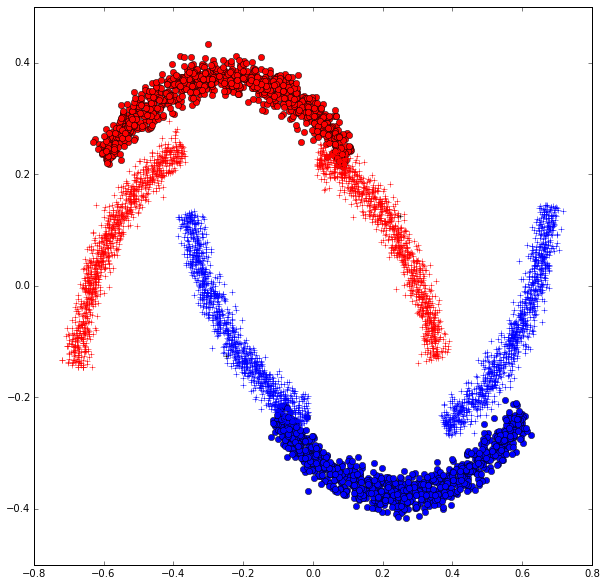

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(S_0[:,0], S_0[:,1], 'ro')
ax.plot(S_1[:,0], S_1[:,1], 'bo')
ax.plot(T_0[:,0], T_0[:,1], 'r+')
ax.plot(T_1[:,0], T_1[:,1], 'b+')
ax.plot(S_0_origin[0], S_0_origin[1], 'k+')
ax.plot(S_1_origin[0], S_1_origin[1], 'k+')
#plt.show()
plt.savefig('Twin_moon.png')

In [56]:
file_name = 'Twin_moon'

r_train = 0.5
r_validate = 0.3

S_train_n = np.floor(N_s * r_train).astype(int)
S_validataion_n = np.floor(N_s * r_validate).astype(int)
S_test_n = N_s - S_train_n - S_validataion_n

#---------------------------------------------------
n = S_test_n
ind = range(n/2)
test_S_fts=np.append(S_0[ind, :], S_1[ind, :], axis=0)
test_S_labels = np.zeros((n, 2))
test_S_labels[0:n/2, 0] = 1
test_S_labels[n/2:, 1] = 1
S_0 = np.delete(S_0, (ind), axis = 0)
S_1 = np.delete(S_1, (ind), axis = 0)

n = S_validataion_n
ind = range(n/2)
validataion_S_fts=np.append(S_0[ind, :], S_1[ind, :], axis=0)
validataion_S_labels = np.zeros((n, 2))
validataion_S_labels[0:n/2, 0] = 1
validataion_S_labels[n/2:, 1] = 1
S_0 = np.delete(S_0, (ind), axis = 0)
S_1 = np.delete(S_1, (ind), axis = 0)

n = S_train_n
S_fts = np.append(S_0, S_1, axis = 0)
S_labels = np.zeros((n, 2))
S_labels[0:n/2, 0] = 1
S_labels[n/2:, 1] = 1

index = np.random.permutation(n)
train_S_fts = S_fts[index, :]
train_S_labels  = S_labels[index, :]


#---------------------------------------------------

T_train_n = np.floor(N_t * r_train).astype(int)
T_validataion_n = np.floor(N_t * r_validate).astype(int)
T_test_n = N_t - T_train_n - T_validataion_n

n = T_test_n
ind = range(n/2)
test_T_fts=np.append(T_0[ind, :], T_1[ind, :], axis=0)
test_T_labels = np.zeros((n, 2))
test_T_labels[0:n/2, 0] = 1
test_T_labels[n/2:, 1] = 1
T_0 = np.delete(T_0, (ind), axis = 0)
T_1 = np.delete(T_1, (ind), axis = 0)

n = T_validataion_n
ind = range(n/2)
validataion_T_fts=np.append(T_0[ind, :], T_1[ind, :], axis=0)
validataion_T_labels = np.zeros((n, 2))
validataion_T_labels[0:n/2, 0] = 1
validataion_T_labels[n/2:, 1] = 1
T_0 = np.delete(T_0, (ind), axis = 0)
T_1 = np.delete(T_1, (ind), axis = 0)

n = T_train_n
T_fts = np.append(T_0, T_1, axis = 0)
T_labels = np.zeros((n, 2))
T_labels[0:n/2, 0] = 1
T_labels[n/2:, 1] = 1

index = np.random.permutation(n)
train_T_fts = T_fts[index, :]
train_T_labels  = T_labels[index, :]

#---------------------------------------------------

pkl = [(train_S_fts, train_S_labels), (validataion_S_fts, validataion_S_labels), (test_S_fts, test_S_labels), 
      (train_T_fts, train_T_labels), (validataion_T_fts, validataion_T_labels), (test_T_fts, test_T_labels)]
    
np.save(file_name, pkl)

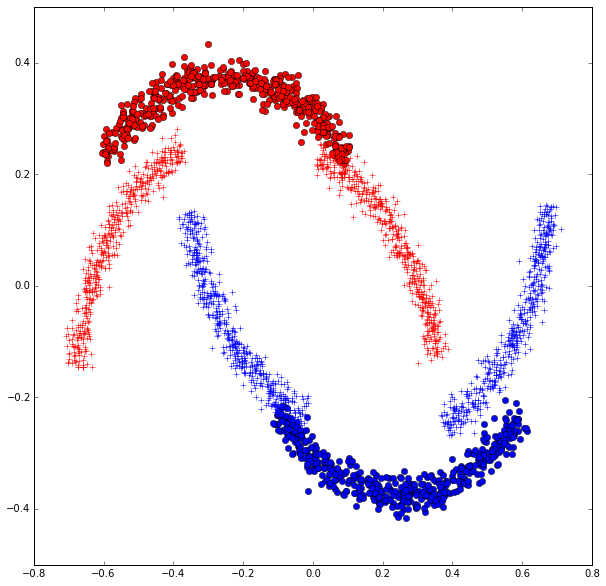

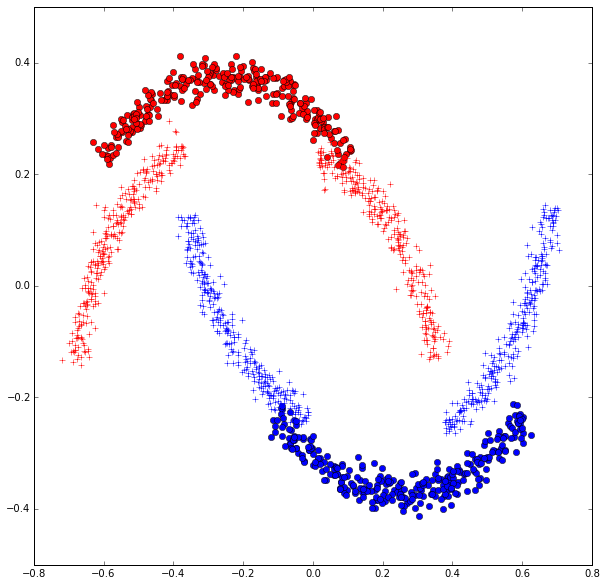

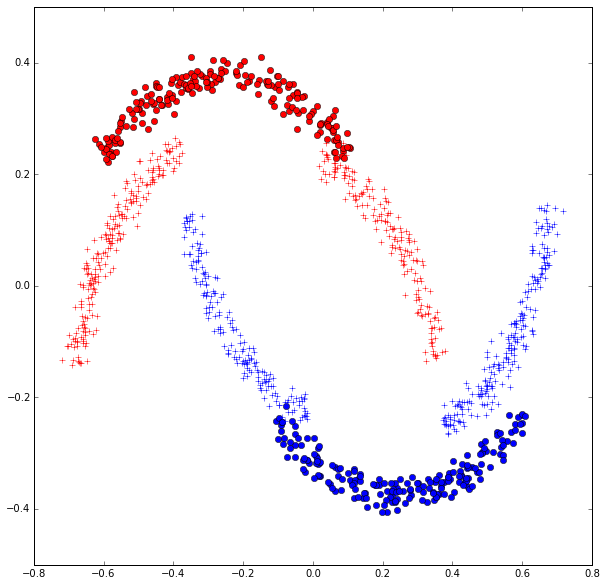

In [57]:
S_0 = train_S_fts[np.where(train_S_labels[:,0] == 1)]
S_1 = train_S_fts[np.where(train_S_labels[:,1] == 1)]
T_0 = train_T_fts[np.where(train_T_labels[:,0] == 1)]
T_1 = train_T_fts[np.where(train_T_labels[:,1] == 1)]

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(S_0[:,0], S_0[:,1], 'ro')
ax.plot(S_1[:,0], S_1[:,1], 'bo')
ax.plot(T_0[:,0], T_0[:,1], 'r+')
ax.plot(T_1[:,0], T_1[:,1], 'b+')
plt.show()

S_0 = validataion_S_fts[np.where(validataion_S_labels[:,0] == 1)]
S_1 = validataion_S_fts[np.where(validataion_S_labels[:,1] == 1)]
T_0 = validataion_T_fts[np.where(validataion_T_labels[:,0] == 1)]
T_1 = validataion_T_fts[np.where(validataion_T_labels[:,1] == 1)]

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(S_0[:,0], S_0[:,1], 'ro')
ax.plot(S_1[:,0], S_1[:,1], 'bo')
ax.plot(T_0[:,0], T_0[:,1], 'r+')
ax.plot(T_1[:,0], T_1[:,1], 'b+')
plt.show()

S_0 = test_S_fts[np.where(test_S_labels[:,0] == 1)]
S_1 = test_S_fts[np.where(test_S_labels[:,1] == 1)]
T_0 = test_T_fts[np.where(test_T_labels[:,0] == 1)]
T_1 = test_T_fts[np.where(test_T_labels[:,1] == 1)]

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(S_0[:,0], S_0[:,1], 'ro')
ax.plot(S_1[:,0], S_1[:,1], 'bo')
ax.plot(T_0[:,0], T_0[:,1], 'r+')
ax.plot(T_1[:,0], T_1[:,1], 'b+')
plt.show()

